In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [57]:
%run Jean.ipynb
data = data_clean

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.2847415955845462
0.25


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Correlations

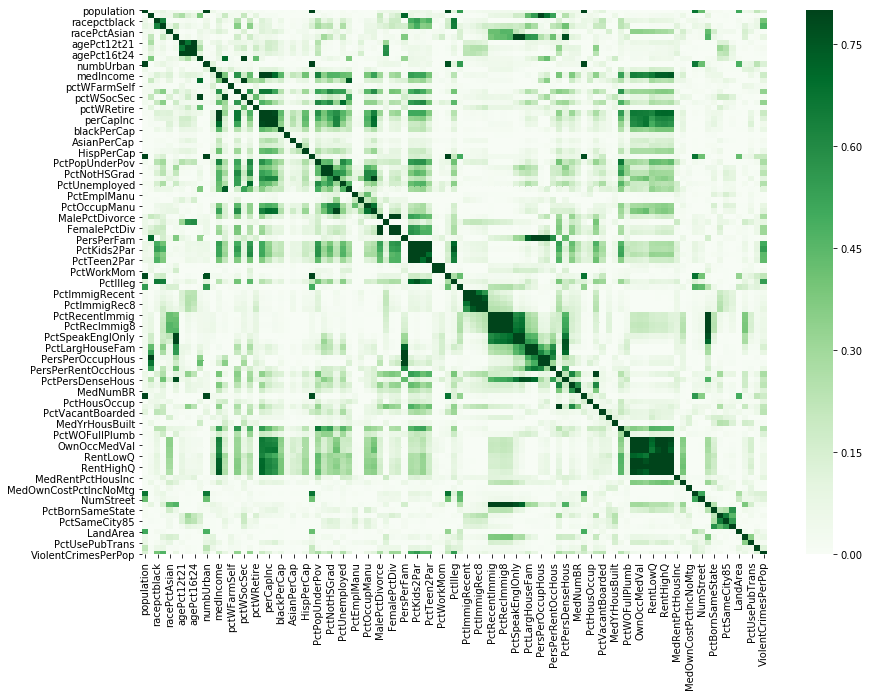

In [88]:
import seaborn as sns

corrmat = (data.astype(float).corr())**2
fig = plt.figure(figsize = (14, 10))

sns.heatmap(corrmat, vmax = 0.8, cmap='Greens')
plt.show()

In [87]:
corrT = (data.astype(float).corr())**2
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'], ascending=False)
corrT['ViolentCrimesPerPop'].head(8)

ViolentCrimesPerPop    1.000000
PctKids2Par            0.545457
PctIlleg               0.544440
PctFam2Par             0.499646
racePctWhite           0.468645
PctYoungKids2Par       0.443801
PctTeen2Par            0.437991
racepctblack           0.398818
Name: ViolentCrimesPerPop, dtype: float64

# PCA

In [117]:
# Train and test sets

X = data.iloc[:,0:100].values
y = data.iloc[:,100].values

#Standardize
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


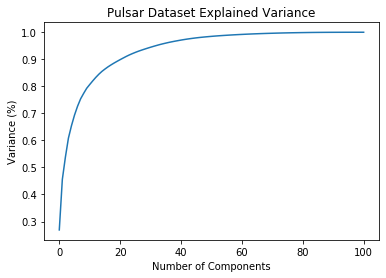

In [115]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [118]:
c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))



Amount of variance: [24.58793871 16.79297677  8.91738588  7.34963787  5.66967838  4.15215776
  3.31811214  2.90024168  2.03709125  1.56148675  1.54845363  1.44678162
  1.38774745  1.05063481]
Sum of the variance: 82.72
Percentage of variance: [0.24918751 0.17018914 0.09037363 0.07448522 0.0574596  0.04208022
 0.03362755 0.02939262 0.02064499 0.01582495 0.01569287 0.01466247
 0.01406419 0.0106477 ]
Sum of the percentage of variance: 0.84
